**Partie I :**

In [ ]:
import pandas as pd

# 1. Lire l’ensemble de données ‘dataframe’:
data = {'Name': ['Ahmed', 'Salma', 'Oussema', 'Seif', 'Rami', 'Sarah', 'Samia'],
        'Age': [17, 17, 18, 17, 18, 17, 17],
        'Genre': ['M', 'F', 'M', 'M', 'M', 'F', 'F'],
        'Poids': [90, 76, 'NaN', 74, 65, 'NaN', 71]}

df = pd.DataFrame(data)

In [ ]:
# Remplir les valeurs manquantes:
df['Poids'] = pd.to_numeric(df['Poids'], errors='coerce')  # Convertir les 'NaN' en valeurs NaN reconnues par Pandas
df['Poids'] = df['Poids'].fillna(df['Poids'].mean())

In [ ]:
# 3. Remplacer les données de la colonne ‘Genre’ par des valeurs numériques
df['Genre'] = df['Genre'].map({'M': 0, 'F': 1})

In [ ]:
# 4. Supprimer la colonne ‘Age’ et afficher seulement les sujets qui présentent un poids supérieur à 70
df = df.drop(columns=['Age'])
result = df[df['Poids'] > 70]
print(result)


      Name  Genre  Poids
0    Ahmed      0   90.0
1    Salma      1   76.0
2  Oussema      0   75.2
3     Seif      0   74.0
5    Sarah      1   75.2
6    Samia      1   71.0


**Partie II :**

In [ ]:
import numpy as np
import pandas as pd
details = pd.DataFrame({
'ID': [110, 111, 112, 113, 114, 115,
116, 117, 118, 119, 120, 121],
'Premon': [' Adam', ' Gabriel', ' Léo',
' Marceau ', 'Rahul', ' Jules',
' Lucas', 'Gabriel', 'Patrice', ' Samuel', 'Adam', ' Victor'],
'Specialité': ['SE', 'TS', 'FM', 'TM', 'IG',
'SE', 'TS','TS', 'FM', 'BTM','SE', 'GE']})

Frais_Payement= pd.DataFrame(
{ 'ID': [110, 111, 112, 113, 114, 115,
116, 117, 118, 119, 120, 121],

'Frais Payement': ['5000', '3500', 'NIL',
'2500', '2500', 'NIL',
'3500', '4000', '2500', 'NIL','3000','NIL']})

In [ ]:
# 1. Lire les deux ensembles de données ‘dataframe’:
df1 = pd.DataFrame(details)
df2 = pd.DataFrame(Frais_Payement)

In [ ]:
# 2. Remplir les valeurs manquantes de ‘Frais Payement’:
df2['Frais Payement'] = df2['Frais Payement'].replace('NIL', np.nan)
df2['Frais Payement'] = df2['Frais Payement'].astype(float)
df2['Frais Payement'].fillna(df2['Frais Payement'].mean(), inplace=True)


<ipython-input-46-c7f074bb8001>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Frais Payement'].fillna(df2['Frais Payement'].mean(), inplace=True)


In [ ]:
# Changer les données de la colonne ‘Frais Payement’ par des valeurs unitaires (par exemple, diviser par 1000)
df2['Frais Payement'] = df2['Frais Payement'] / 1000
print(df2)

     ID  Frais Payement
0   110          5.0000
1   111          3.5000
2   112          3.3125
3   113          2.5000
4   114          2.5000
5   115          3.3125
6   116          3.5000
7   117          4.0000
8   118          2.5000
9   119          3.3125
10  120          3.0000
11  121          3.3125


In [ ]:

# Fusionner les deux DataFrames sur la colonne 'ID'
merged_df = pd.merge(df1, df2, on='ID')

# Supprimer les doublons
merged_df.drop_duplicates(inplace=True)
print(merged_df)

     ID     Premon Specialité  Frais Payement
0   110       Adam         SE          5.0000
1   111    Gabriel         TS          3.5000
2   112        Léo         FM          3.3125
3   113   Marceau          TM          2.5000
4   114      Rahul         IG          2.5000
5   115      Jules         SE          3.3125
6   116      Lucas         TS          3.5000
7   117    Gabriel         TS          4.0000
8   118    Patrice         FM          2.5000
9   119     Samuel        BTM          3.3125
10  120       Adam         SE          3.0000
11  121     Victor         GE          3.3125


In [ ]:
# Changer les données de la colonne ‘Specialité’ par des valeurs numériques
specialite_mapping = {value: idx for idx, value in enumerate(merged_df['Specialité'].unique())}
merged_df['Specialité'] = merged_df['Specialité'].map(specialite_mapping)

print(merged_df)

     ID     Premon  Specialité  Frais Payement
0   110       Adam           0          5.0000
1   111    Gabriel           1          3.5000
2   112        Léo           2          3.3125
3   113   Marceau            3          2.5000
4   114      Rahul           4          2.5000
5   115      Jules           0          3.3125
6   116      Lucas           1          3.5000
7   117    Gabriel           1          4.0000
8   118    Patrice           2          2.5000
9   119     Samuel           5          3.3125
10  120       Adam           0          3.0000
11  121     Victor           6          3.3125


**Partie III :**

**Les ensembles de données utilisés sont synthétiques (créés artificiellement via des simulations),mais ont été générés pour refléter la demande réelle des services d'urgence.**

Un ensemble de données peut être écrit dans deux formats différents : large et long. Un format large
contient des valeurs qui ne se répètent pas dans la première colonne. Un format long contient des
valeurs qui se répètent dans la première colonne.

Cet exercice est conçu pour lire un fichier CSV et le transformer en un tableau de données
(DataFrame) au format "large" à partir d'une source de données au format "long".

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
DataLong1_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/syn_ts_ed_long.csv'
DataLarge1_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/syn_ts_ed_wide.csv'


In [ ]:
long_df = pd.read_csv(DataLong1_URL)
print("\nColonnes:")
print(long_df.columns)
long_df.head()


Colonnes:
Index(['date', 'hosp', 'attends'], dtype='object')


,date,hosp,attends
0,2014-04-01,1,331
1,2014-04-02,1,340
2,2014-04-03,1,316
3,2014-04-04,1,304
4,2014-04-05,1,292


In [ ]:
long_df.tail()

,date,hosp,attends
1095,2014-12-27,4,198
1096,2014-12-28,4,176
1097,2014-12-29,4,164
1098,2014-12-30,4,164
1099,2014-12-31,4,148


In [ ]:
larg_df = pd.read_csv(DataLarge1_URL)
larg_df.head()

,date,hosp_1,hosp_2,hosp_3,hosp_4
0,2014-04-01,331,287,195,184
1,2014-04-02,340,293,177,181
2,2014-04-03,316,249,183,192
3,2014-04-04,304,313,208,157
4,2014-04-05,292,291,218,166


In [ ]:

def ed_data_to_wide(file_path):
    # column name transformation
    translated_names = {0:'hosp_1',
                        1:'hosp_2',
                        2:'hosp_3',
                        3:'hosp_4'}

    data_types = {'hosp_1':np.int64,
                  'hosp_2':np.int64,
                  'hosp_3':np.int64,
                  'hosp_4':np.int64}

    long_df = (pd.read_csv(file_path)
            .pivot_table(values=['attends'], index=['date'], columns=['hosp'])
            .T.reset_index(drop=True)
            .T.rename(columns=translated_names)
            .assign(date=lambda x: pd.to_datetime(x.index))
            .set_index('date')
            .astype(data_types)
         )

    return long_df
larg_df = ed_data_to_wide(DataLong1_URL)
larg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2014-04-01 to 2014-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hosp_1  275 non-null    int64
 1   hosp_2  275 non-null    int64
 2   hosp_3  275 non-null    int64
 3   hosp_4  275 non-null    int64
dtypes: int64(4)
memory usage: 10.7 KB


In [ ]:
large_df = ed_data_to_wide(DataLong1_URL)
large_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2014-04-01 to 2014-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   hosp_1  275 non-null    int64
 1   hosp_2  275 non-null    int64
 2   hosp_3  275 non-null    int64
 3   hosp_4  275 non-null    int64
dtypes: int64(4)
memory usage: 10.7 KB


In [ ]:
def ed_data_to_long(file_path):
    translated_names = {'hosp_':'attends'}
    data_types = {'hosp': np.int16, 'attends':np.int64}

    long_df = (
                pd.wide_to_long(pd.read_csv(file_path), stubnames='hosp_',
                                i=['date'], j='hosp')
                .reset_index()
                .rename(columns=translated_names)
                .assign(date=lambda x: pd.to_datetime(x['date']))
                .astype(data_types)
                )

    return long_df

In [ ]:
long_df = ed_data_to_long(DataLarge1_URL)
long_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1100 non-null   datetime64[ns]
 1   hosp     1100 non-null   int16         
 2   attends  1100 non-null   int64         
dtypes: datetime64[ns](1), int16(1), int64(1)
memory usage: 19.5 KB


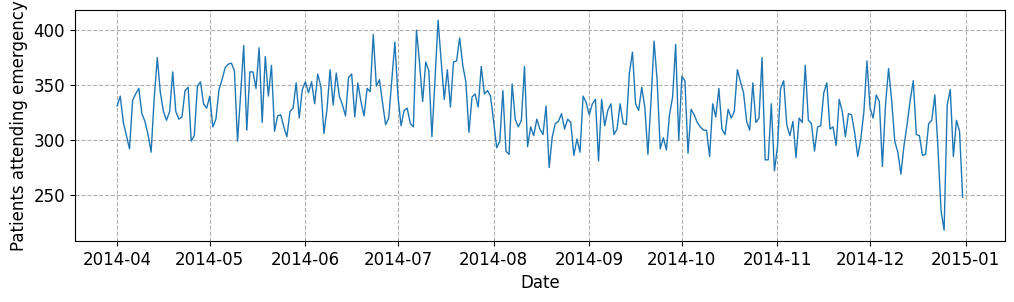

In [ ]:
# example solution

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Patients attending emergency", fontsize=12)

_ = ax.plot(large_df['hosp_1'], lw=1)
# include x, y grid
_ = ax.grid(ls='--')

# set size of x, y ticks
_ = ax.tick_params(axis='both', labelsize=12)

# save the figure
fig.savefig('hosp_1_ed.png', dpi=300)

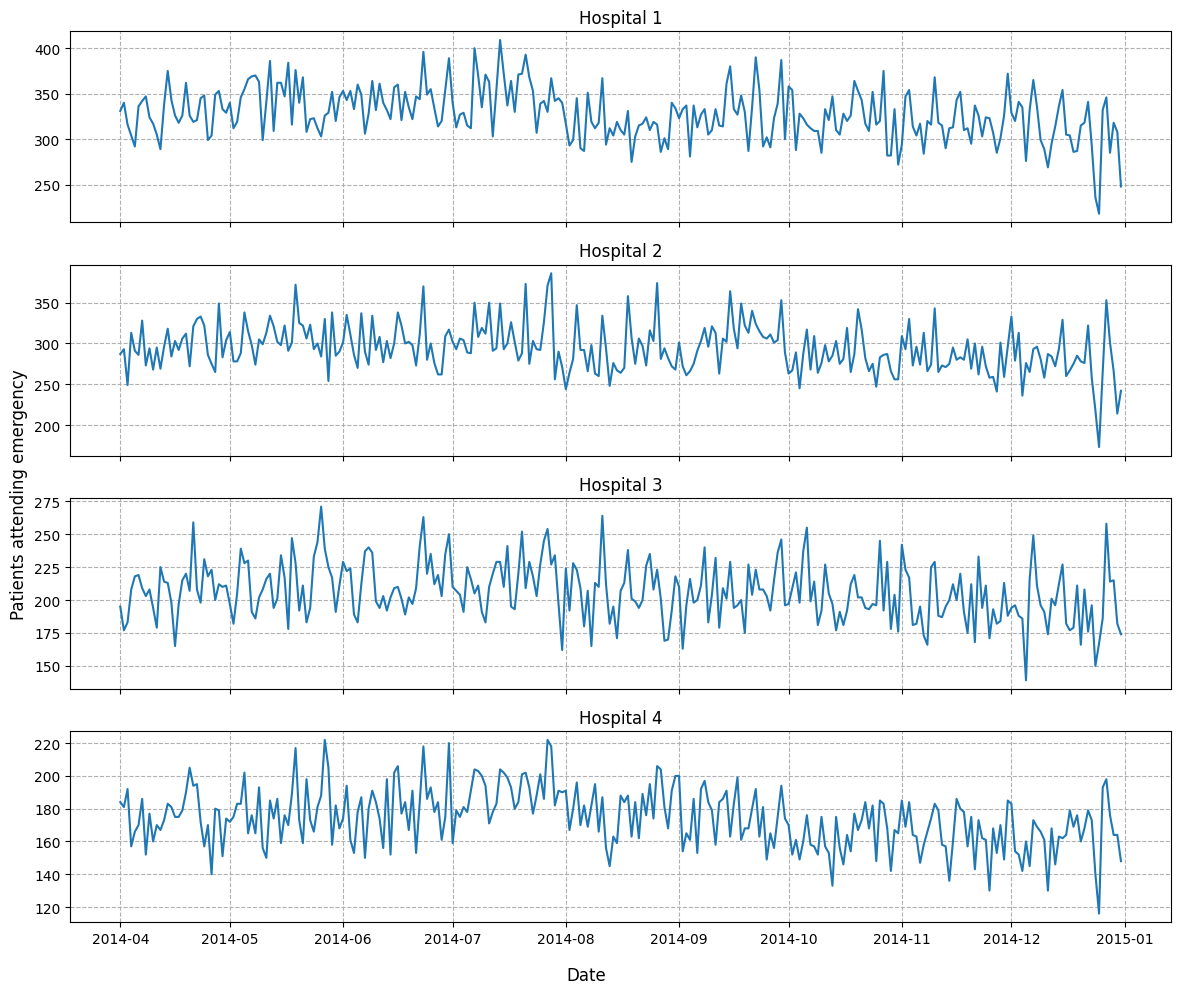

In [ ]:

fig, axs = plt.subplots(nrows=4, ncols=1, tight_layout=True, figsize=(12,10),
                        sharex=True)

# note that axis is a 2D array
FS_SUBTITLE = 12
for hosp_idx in range(0,4):
    _ = axs[hosp_idx].plot(large_df[f'hosp_{hosp_idx+1}'])
    _ = axs[hosp_idx].set_title(f'Hospital {hosp_idx+1}', fontsize=FS_SUBTITLE)
    _ = axs[hosp_idx].grid(ls='--')

# axis labels matplotlib
AXIS_LABEL_SIZE = 12
_ = fig.supylabel('Patients attending emergency', fontsize=AXIS_LABEL_SIZE)
_ = fig.supxlabel('Date', fontsize=AXIS_LABEL_SIZE)